# 1 - Normalization

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


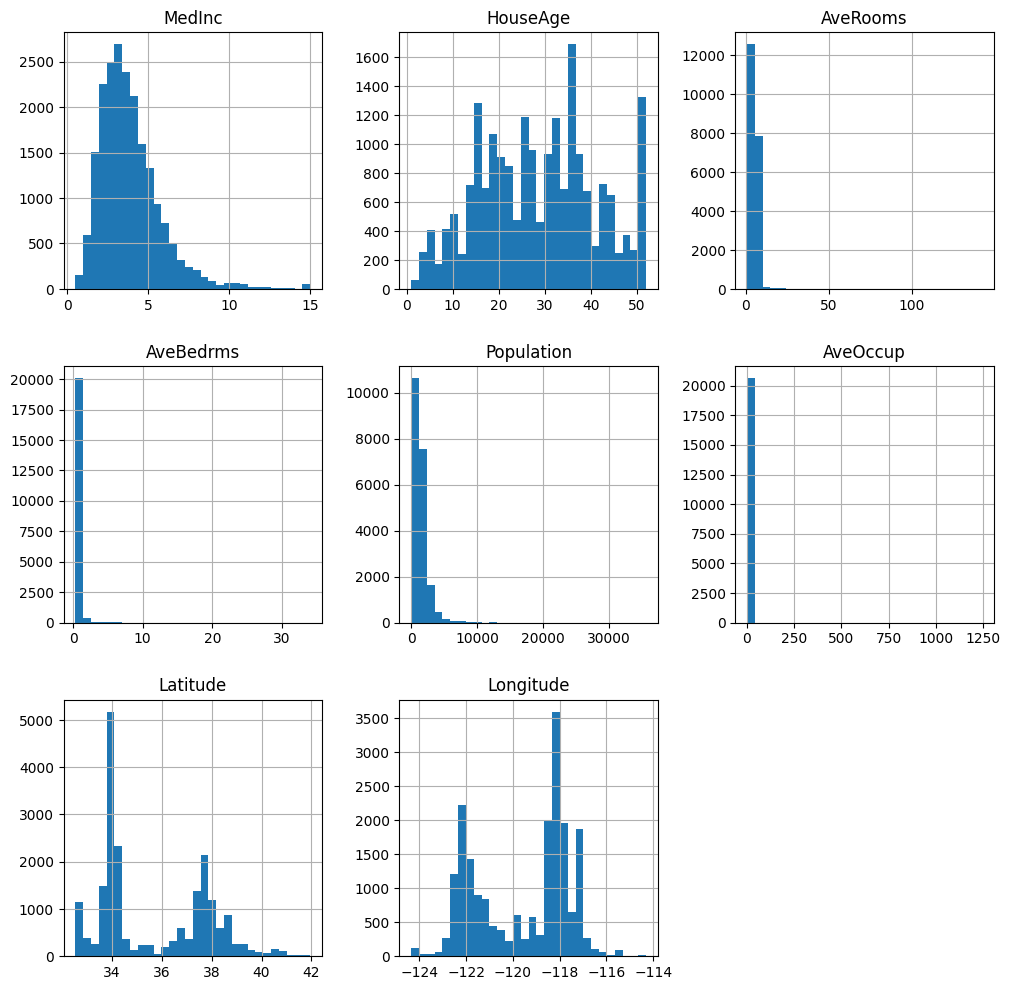

In [9]:
X.hist(bins=30, figsize=(12, 12))
plt.show()

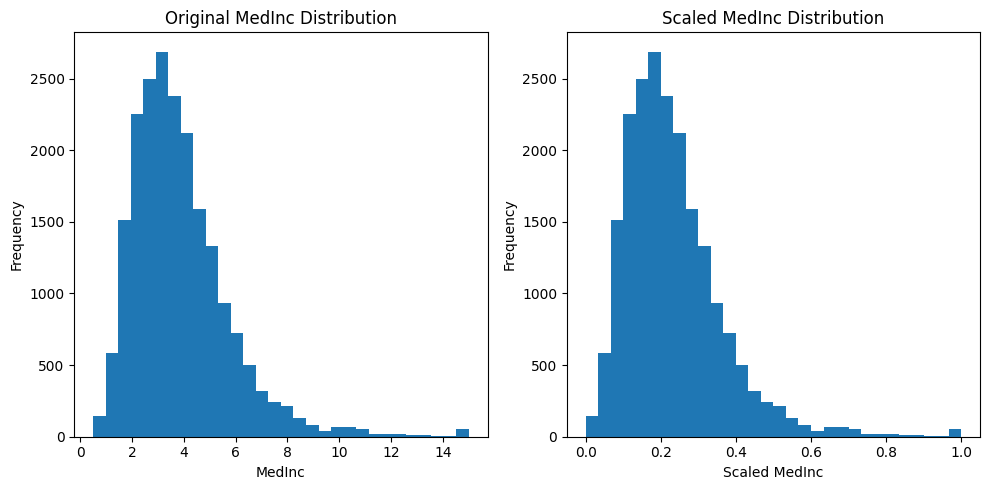

In [10]:
# Perform a min-max scaling on MedInc variable , plot the histogram before and after

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
scaled_MedInc = scaler.fit_transform(X[['MedInc']])

# Plot the histogram before scaling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(X['MedInc'], bins=30)
plt.title('Original MedInc Distribution')
plt.xlabel('MedInc')
plt.ylabel('Frequency')

# Plot the histogram after scaling
plt.subplot(1, 2, 2)
plt.hist(scaled_MedInc, bins=30)
plt.title('Scaled MedInc Distribution')
plt.xlabel('Scaled MedInc')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


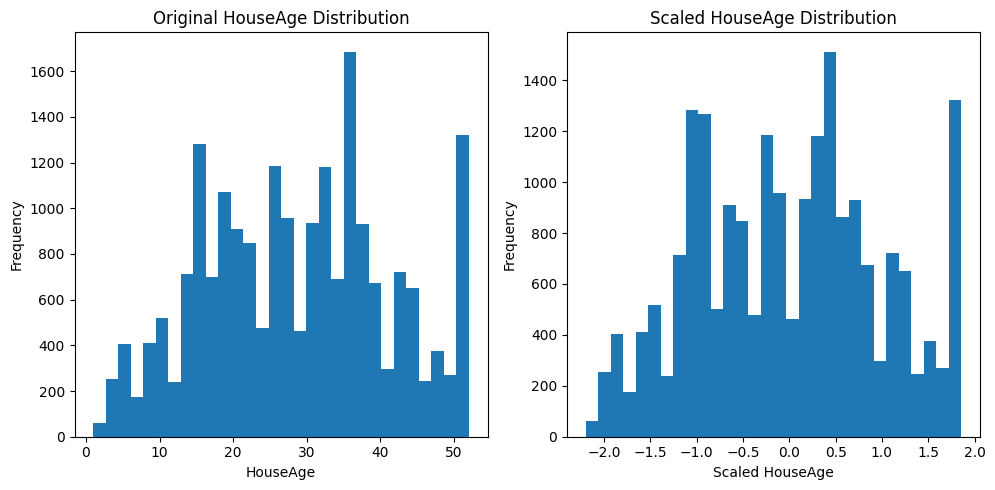

In [11]:
# perform a Standard scaling on HouseAge variable , plot the histogram before and after

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data using the scaler
scaled_HouseAge = scaler.fit_transform(X[['HouseAge']])

# Plot the histogram before scaling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(X['HouseAge'], bins=30)
plt.title('Original HouseAge Distribution')
plt.xlabel('HouseAge')
plt.ylabel('Frequency')

# Plot the histogram after scaling
plt.subplot(1, 2, 2)
plt.hist(scaled_HouseAge, bins=30)
plt.title('Scaled HouseAge Distribution')
plt.xlabel('Scaled HouseAge')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [12]:
# prompt: Using data frame X: perform l2 Normalization on Population variable
import matplotlib.pyplot as plt
# L2 normalization on 'Population'
from sklearn.preprocessing import Normalizer, normalize

# Perform L2 normalization
scaler = Normalizer()

# Fit and transform the data using the scaler
scaled_Population = scaler.fit_transform(X[['Population']])

x_array = np.array(X['HouseAge'])
print("HouseAge array: ",x_array)

normalized_arr = normalize([x_array])
print("Normalized HouseAge array: ",normalized_arr)


HouseAge array:  [41. 21. 52. ... 17. 18. 16.]
Normalized HouseAge array:  [[0.00912272 0.00467261 0.01157028 ... 0.00378259 0.0040051  0.00356009]]


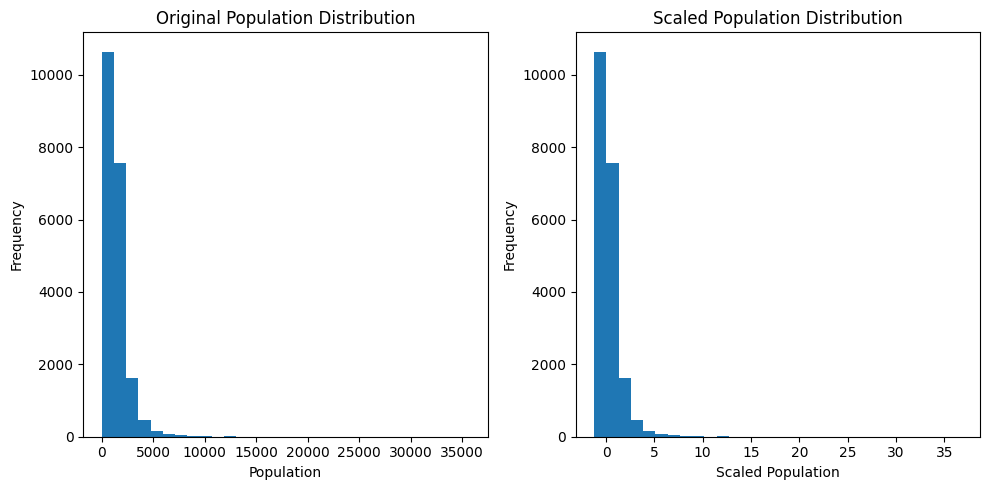

In [13]:
# prompt: Using data frame X: perform RobustScaler on Population variable , plot the histogram before and after

import matplotlib.pyplot as plt
# L2 normalization on 'Population'
from sklearn.preprocessing import RobustScaler

# Perform L2 normalization
scaler = RobustScaler()

# Fit and transform the data using the scaler
scaled_Population = scaler.fit_transform(X[['Population']])

# Plot the histogram before scaling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(X['Population'], bins=30)
plt.title('Original Population Distribution')
plt.xlabel('Population')
plt.ylabel('Frequency')

# Plot the histogram after scaling
plt.subplot(1, 2, 2)
plt.hist(scaled_Population, bins=30)
plt.title('Scaled Population Distribution')
plt.xlabel('Scaled Population')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# 2 - Categorical Encoding

## One Hot Encoder

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [15]:
# Create a sample dataset
data = {
    'id': [1, 2, 3, 4, 5, 6],
    'color': ['red', 'blue', 'green', 'red', 'red', 'blue'],
    'size': ['small', 'medium', 'medium', 'large', 'small', 'large']
}

In [16]:
df = pd.DataFrame(data)
df

,id,color,size
0,1,red,small
1,2,blue,medium
2,3,green,medium
3,4,red,large
4,5,red,small
5,6,blue,large


In [17]:
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df[['color', 'size']])

# Get feature names from encoder
feature_names = encoder.get_feature_names_out(['color', 'size'])

# Create DataFrame with encoded features
df_encoded_sk = pd.DataFrame(encoded_features, columns=feature_names)
df_encoded_sk = pd.concat([df['id'], df_encoded_sk], axis=1)
df_encoded_sk

,id,color_blue,color_green,color_red,size_large,size_medium,size_small
0,1,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1.0,0.0,0.0,0.0,1.0,0.0
2,3,0.0,1.0,0.0,0.0,1.0,0.0
3,4,0.0,0.0,1.0,1.0,0.0,0.0
4,5,0.0,0.0,1.0,0.0,0.0,1.0
5,6,1.0,0.0,0.0,1.0,0.0,0.0


## Label Encoder

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = {
    'id': [1, 2, 3, 4, 5, 6],
    'color': ['red', 'blue', 'green', 'red', 'green', 'blue'],
    'size': ['small', 'medium', 'medium', 'large', 'small', 'large'],
    'quality': ['low', 'medium', 'high', 'medium', 'high', 'low']
}

df = pd.DataFrame(data)
df

,id,color,size,quality
0,1,red,small,low
1,2,blue,medium,medium
2,3,green,medium,high
3,4,red,large,medium
4,5,green,small,high
5,6,blue,large,low


In [20]:
df_label = df.copy()
color_encoder = LabelEncoder()
size_encoder = LabelEncoder()
quality_encoder = LabelEncoder()

df_label['color_encoded'] = color_encoder.fit_transform(df_label['color'])
df_label['size_encoded'] = size_encoder.fit_transform(df_label['size'])
df_label['quality_encoded'] = quality_encoder.fit_transform(df_label['quality'])

df_label

,id,color,size,quality,color_encoded,size_encoded,quality_encoded
0,1,red,small,low,2,2,1
1,2,blue,medium,medium,0,1,2
2,3,green,medium,high,1,1,0
3,4,red,large,medium,2,0,2
4,5,green,small,high,1,2,0
5,6,blue,large,low,0,0,1


In [21]:
color_encoder.inverse_transform([0, 1, 2])

array(['blue', 'green', 'red'], dtype=object)

# 3 - Numerical Variable Transformations

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import fetch_california_housing

In [23]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


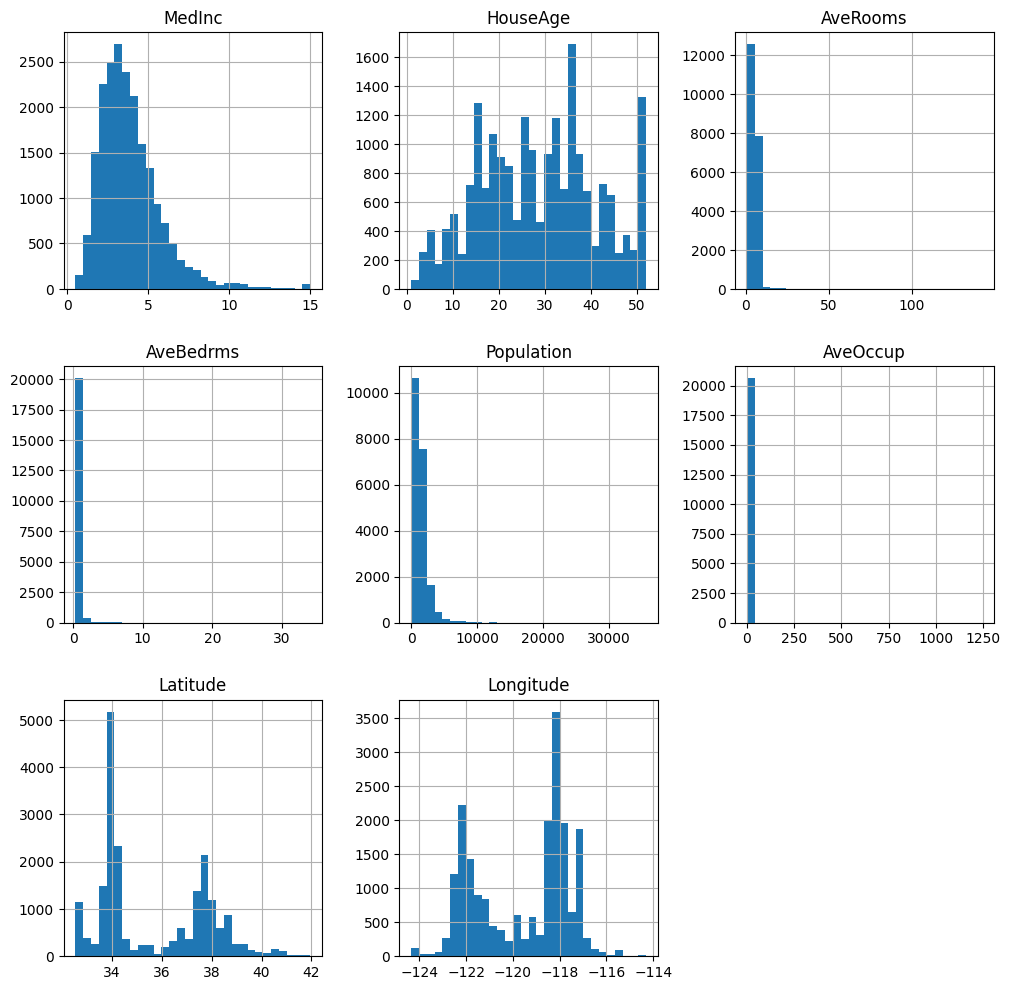

In [24]:
X.hist(bins=30, figsize=(12, 12))
plt.show()

In [25]:
def diagnostic_plots(df, variable):
  plt.figure(figsize=(10,5))
  plt.subplot(1, 2, 1)
  df[variable].hist(bins=30)
  plt.title(f"Histogram of {variable}")
  plt.subplot(1, 2, 2)
  stats.probplot(df[variable], dist="norm", plot=plt)
  plt.title(f"Q-Q plot of {variable}")
  plt.show()

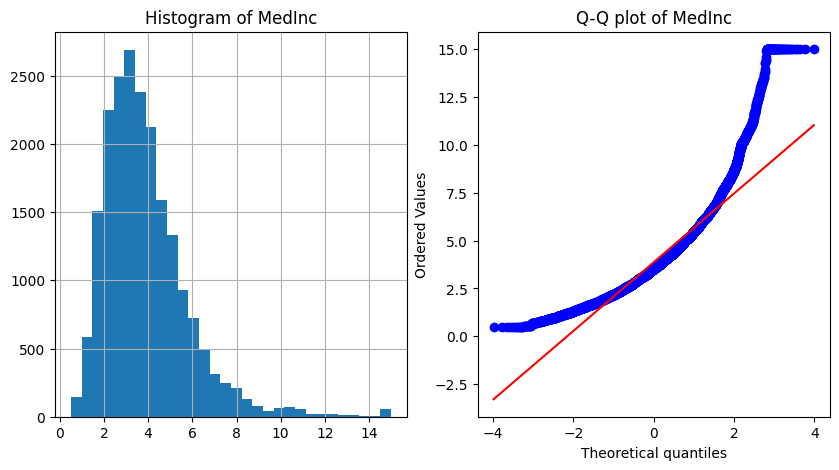

In [26]:
diagnostic_plots(X, "MedInc")

In [27]:
X_tf = X.copy()

In [28]:
vars = ["MedInc", "AveRooms", "AveBedrms", "Population"]

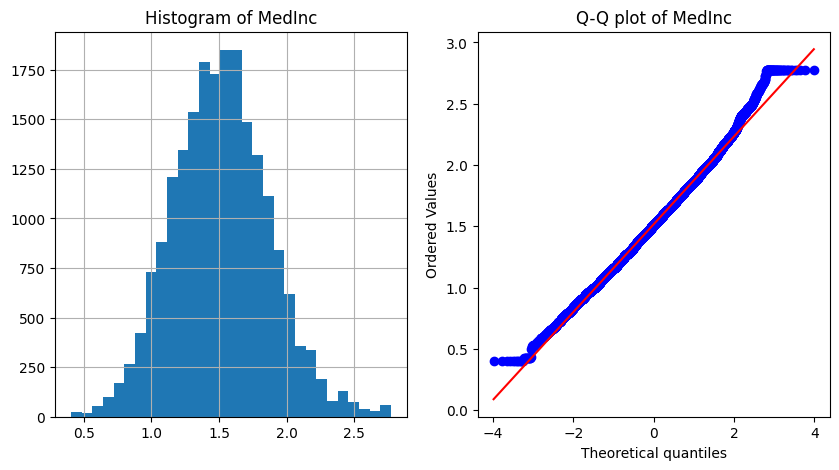

In [29]:
X["MedInc"] = np.log(X["MedInc"]+1)
diagnostic_plots(X, "MedInc")

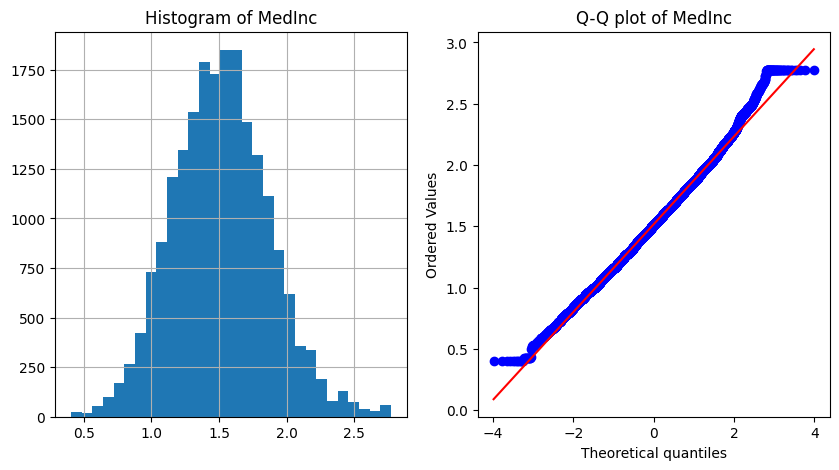

In [30]:
diagnostic_plots(X, "MedInc")

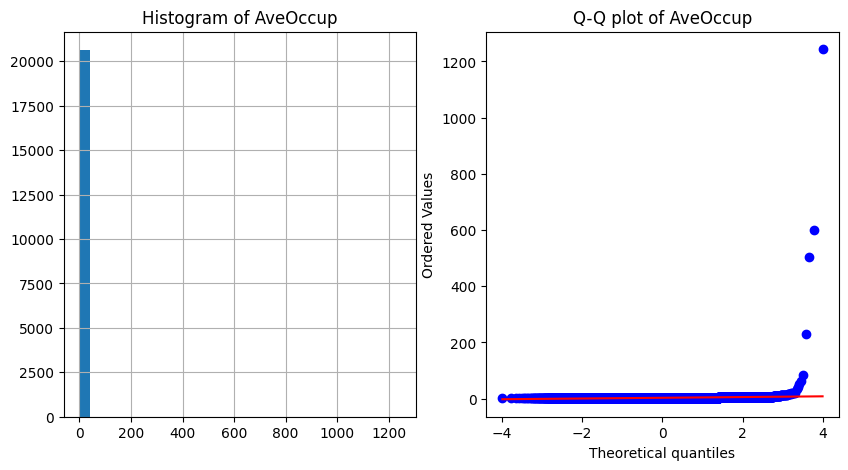

In [31]:
diagnostic_plots(X, "AveOccup")

In [32]:
X_tf["AveOccup"] = np.reciprocal(X_tf["AveOccup"])

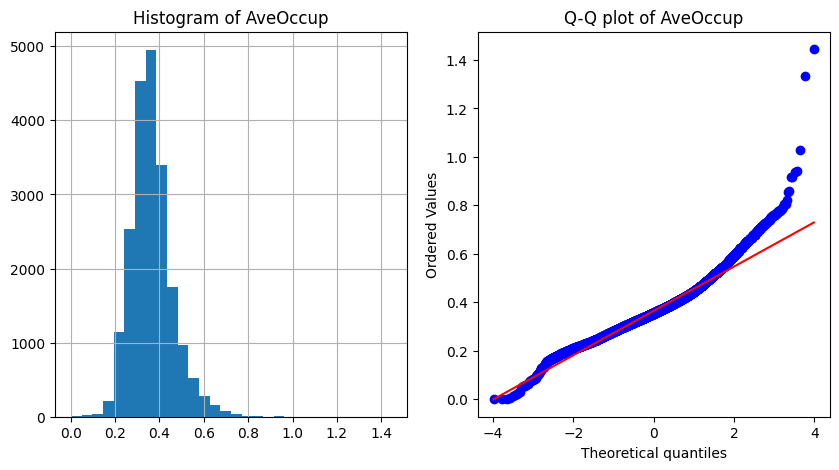

In [33]:
diagnostic_plots(X_tf, "AveOccup")

In [34]:
!pip install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 4.3 MB/s eta 0:00:00


In [35]:
X.drop(labels=["Latitude", "Longitude"], axis=1, inplace=True)

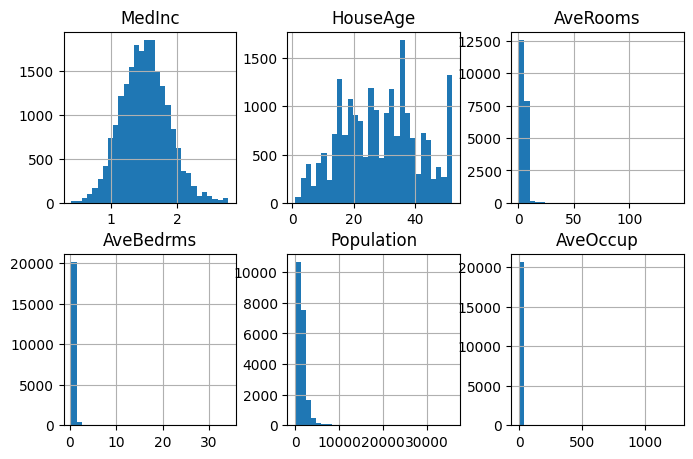

In [36]:
X.hist(bins=30, figsize=(8, 8), layout=(3, 3))
plt.show()

In [37]:
variables = list(X.columns)
def make_qqplot(df):
  plt.figure(figsize=(8, 5), constrained_layout=True)
  for i in range(6):
    # location in figure
    ax = plt.subplot(2, 3, i + 1)
    # variable to plot
    var = variables[i]
    # q-q plot
    stats.probplot((df[var]), dist="norm", plot=plt)
    # add variable name as title
    ax.set_title(var)
  plt.show()

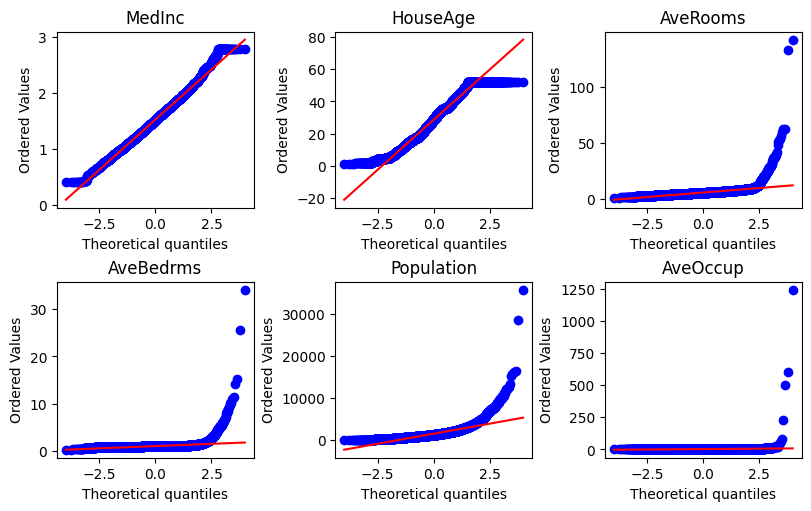

In [38]:
make_qqplot(X)

In [39]:
from feature_engine.transformation import BoxCoxTransformer
bct = BoxCoxTransformer()
bct.fit(X)
X_tf = bct.transform(X)
bct.lambda_dict_

{'MedInc': np.float64(0.7264607321934548),
 'HouseAge': np.float64(0.8093980693938718),
 'AveRooms': np.float64(-0.29800490205071034),
 'AveBedrms': np.float64(-1.6290002880977101),
 'Population': np.float64(0.2357675549594364),
 'AveOccup': np.float64(-0.4763032672955569)}

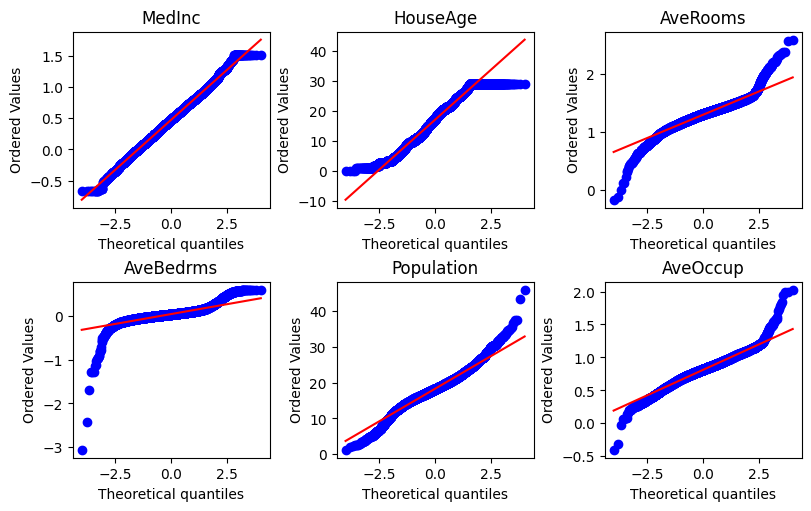

In [40]:
make_qqplot(X_tf)

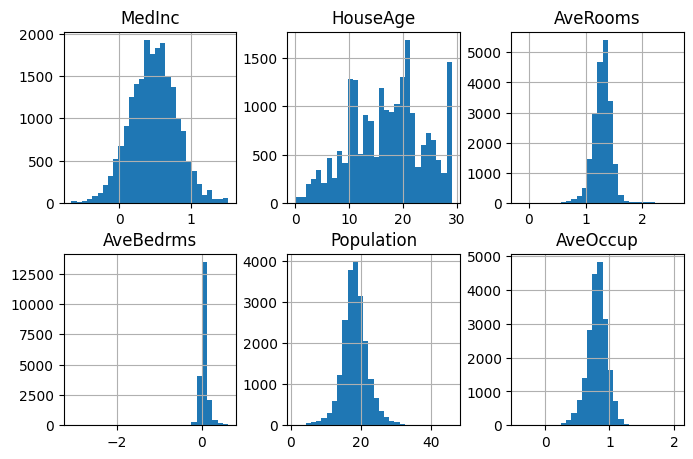

In [41]:
X_tf.hist(bins=30, figsize=(8, 8), layout=(3, 3))
plt.show()

In [42]:
from feature_engine.transformation import YeoJohnsonTransformer
yjt = YeoJohnsonTransformer()
yjt.fit(X)
X_tf = yjt.transform(X)

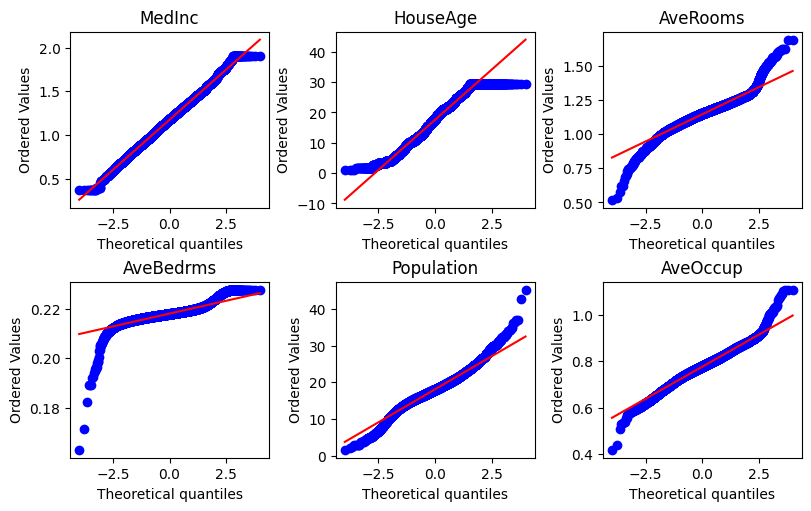

In [43]:
make_qqplot(X_tf)